In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
#download data from kaggle : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
data =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.shape)
data.head()

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
#dropping unnecessary features
data =data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis =1)

C:\Users\B\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\B\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


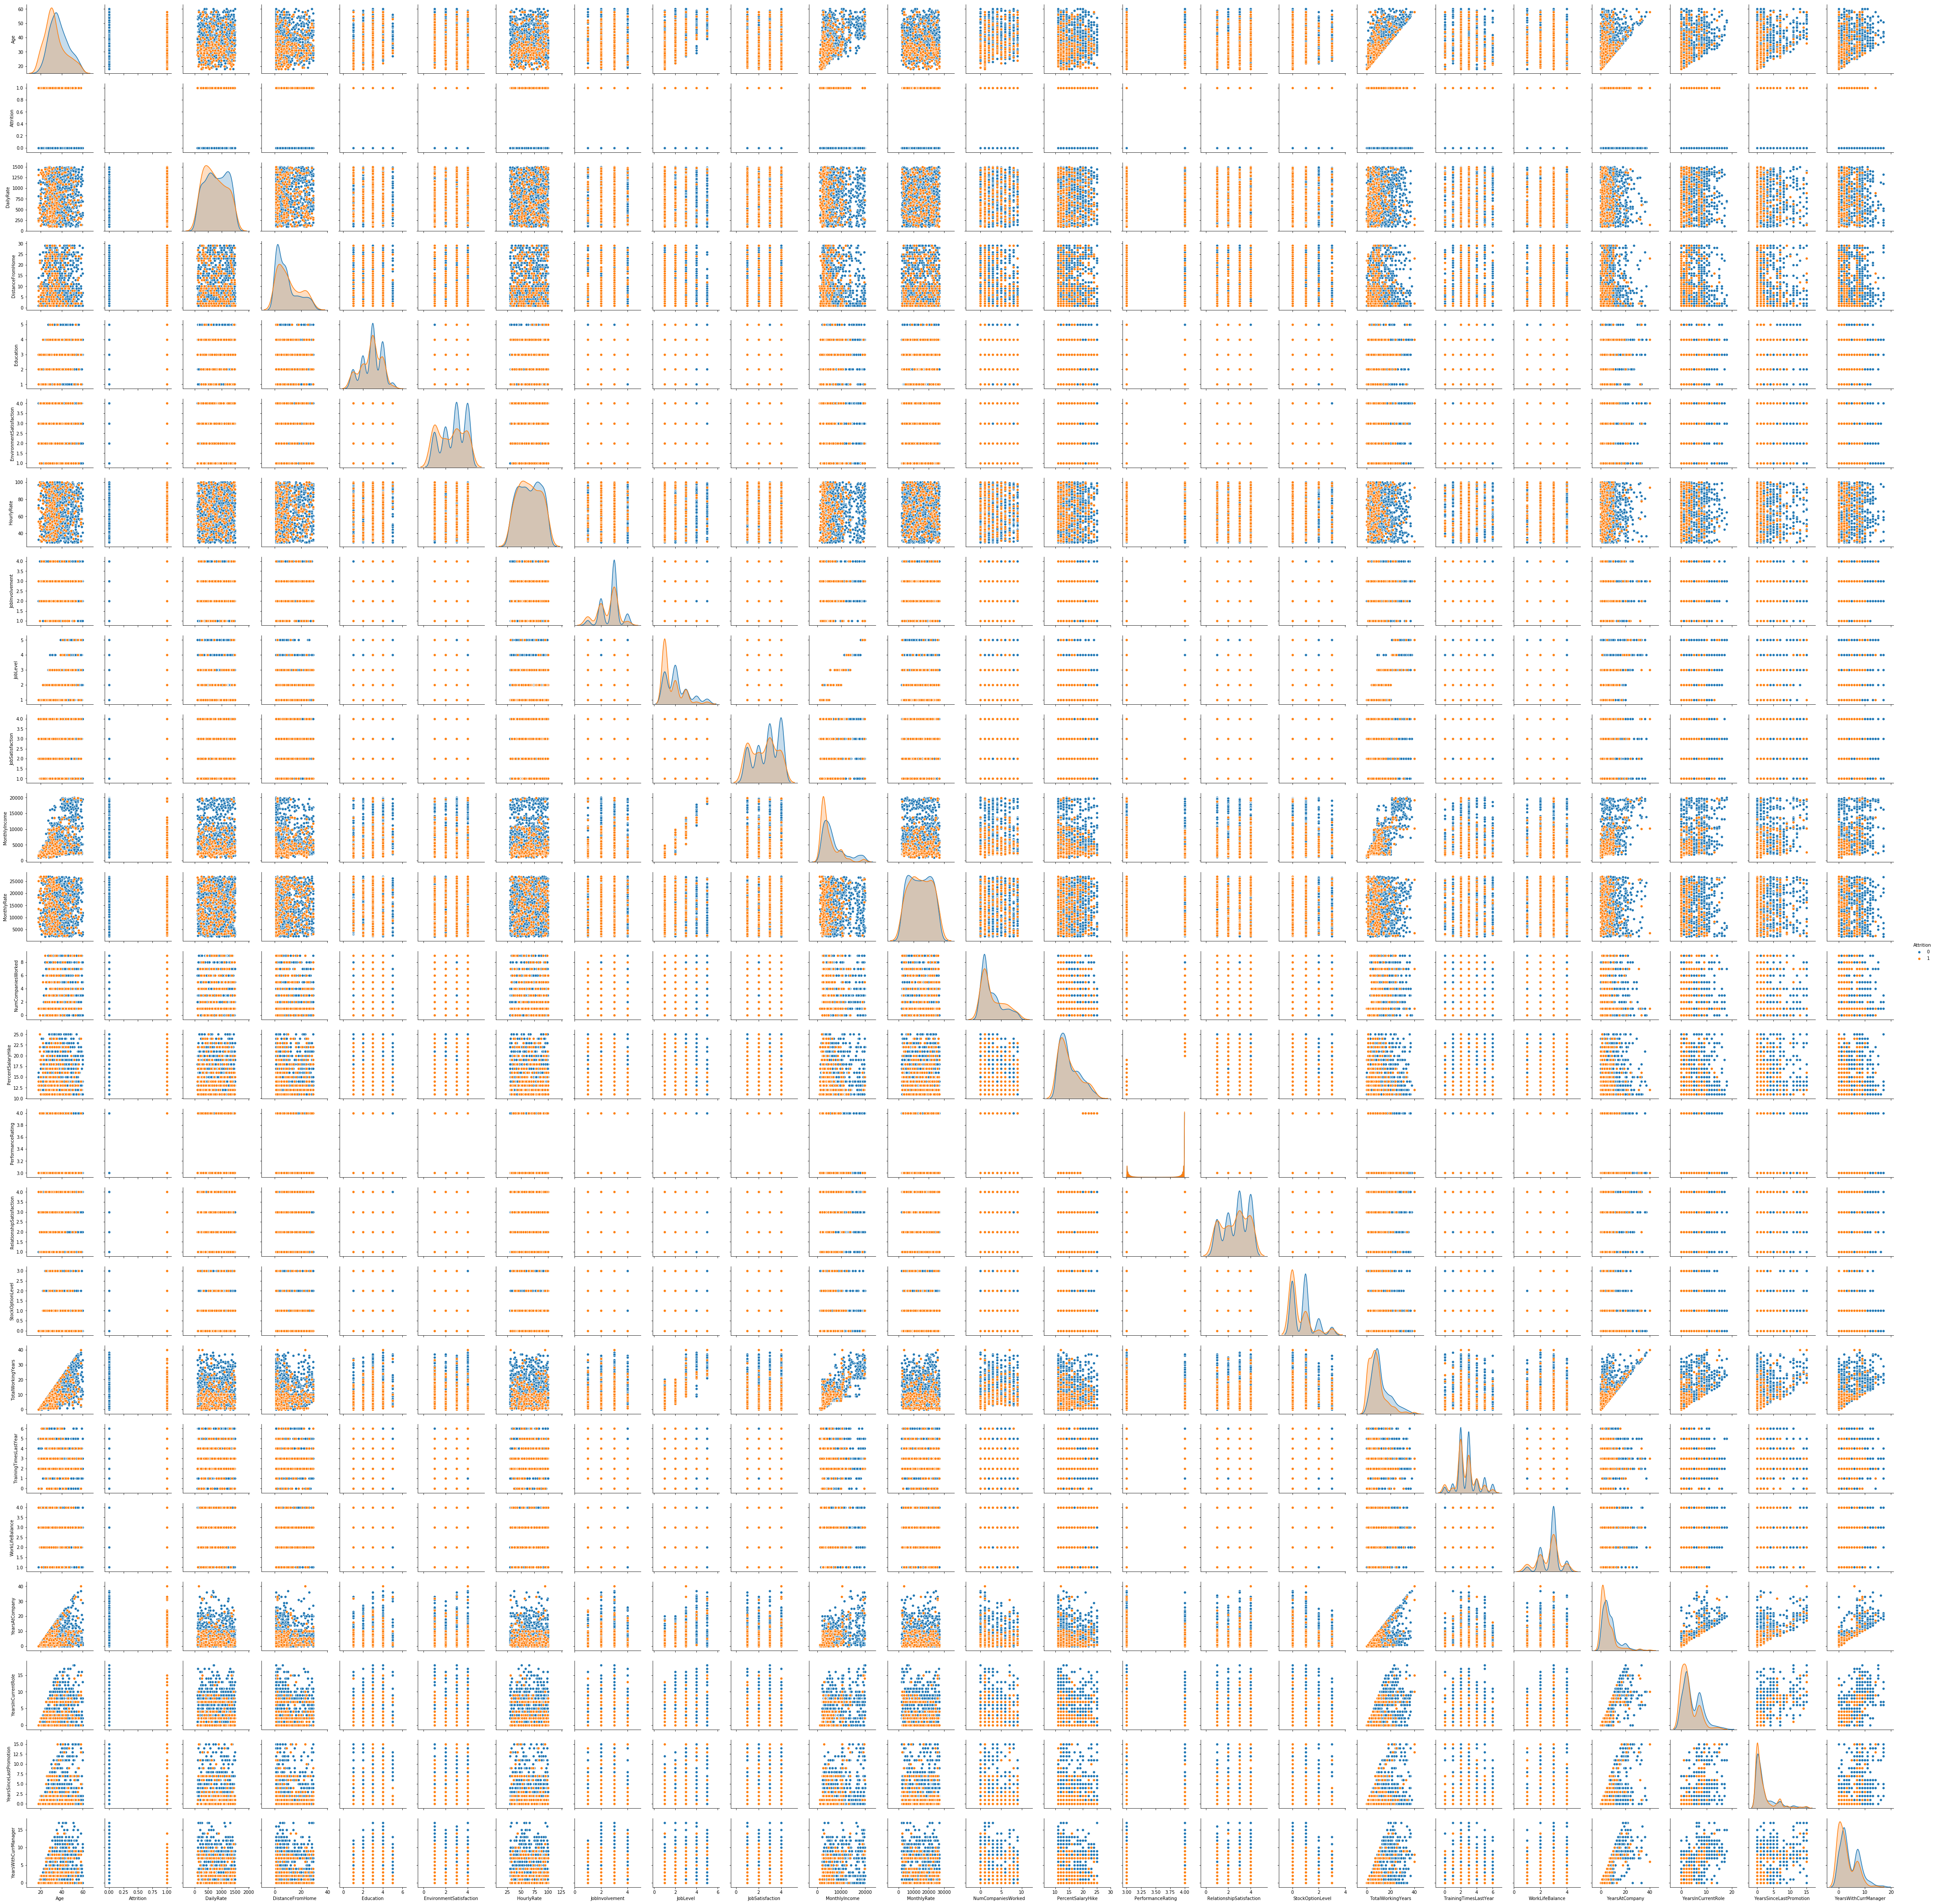

In [56]:
sns.pairplot(data, hue ='Attrition')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [5]:
#maping target variable
attribution={'Yes': 1, 'No':0}
data['Attrition'] =data['Attrition'].map(attribution)

In [6]:
#imbalanced data
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, '0: No Attrition || 1: Attrition')

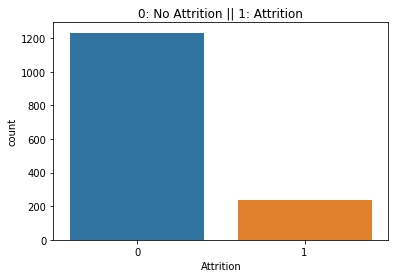

In [11]:
#from the plot we can  clearly see that we are dealing with imbalanced data
sns.countplot('Attrition', data =data)
plt.title('0: No Attrition || 1: Attrition')

In [80]:
print((data.Attrition.value_counts()[0]/len(data))*100,'%')
print((data.Attrition.value_counts()[1]/len(data))*100,'%')

83.87755102040816 %
16.122448979591837 %


In [7]:
attrition = data[data['Attrition'] ==1]
not_attrition =data[data['Attrition']==0][:237]

In [8]:
dataset =pd.concat([attrition, not_attrition])


In [9]:
dataset.Attrition.value_counts()

1    237
0    237
Name: Attrition, dtype: int64

Text(0.5, 1.0, '0: No Attrition || 1: Attrition')

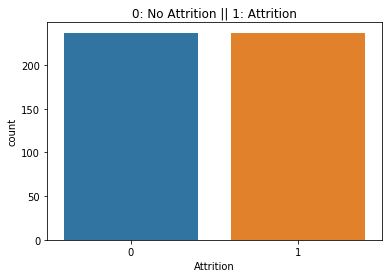

In [12]:
#balanced target variable
sns.countplot('Attrition', data =dataset)
plt.title('0: No Attrition || 1: Attrition')

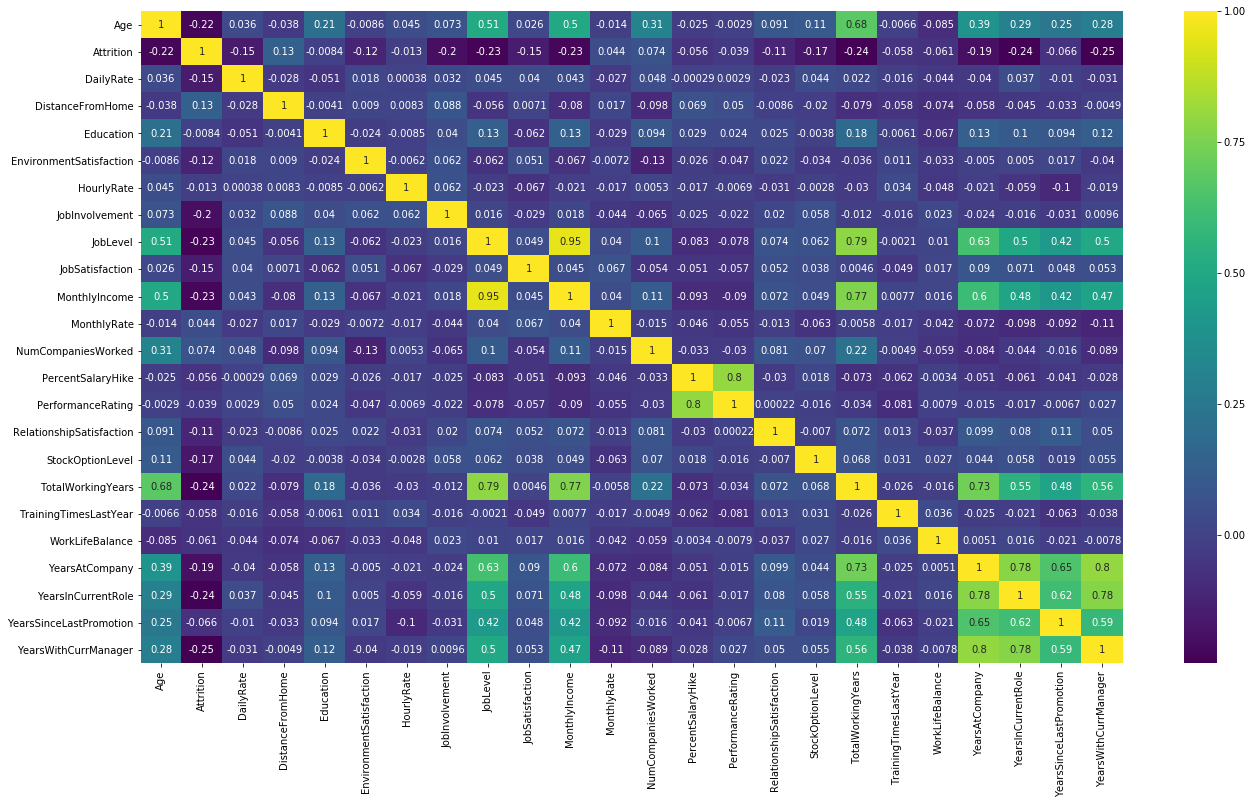

In [54]:
#plotting corolation matrix
plt.figure(figsize=(22,12))
sns.heatmap(dataset.corr(), annot= True, cmap='viridis')

In [13]:
categorical =[col for col in dataset.columns if dataset[col].dtype =='O']
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
numerical =[col for col in dataset.columns if dataset[col].dtype !='O']


In [16]:
#checking for null values
dataset.isnull().sum()
#there are no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [21]:
dataset.describe()

Age   Attrition  BusinessTravel    DailyRate  Department  \
count  474.000000  474.000000      474.000000   474.000000  474.000000   
mean    35.803797    0.500000        0.500000   813.392405    0.500000   
std      9.787678    0.500528        0.080246   409.275157    0.086629   
min     18.000000    0.000000        0.300000   103.000000    0.436066   
25%     29.000000    0.000000        0.485981   464.250000    0.436066   
50%     34.000000    0.500000        0.485981   809.000000    0.436066   
75%     42.000000    1.000000        0.485981  1168.750000    0.609272   
max     59.000000    1.000000        0.610619  1496.000000    0.666667   

       DistanceFromHome   Education  EducationField  EnvironmentSatisfaction  \
count        474.000000  474.000000      474.000000               474.000000   
mean           9.550633    2.848101        0.500000                 2.597046   
std            8.281680    1.010582        0.085209                 1.116885   
min            1.000000    1.000000        0.420000                 1.000000   
25%            2.000000    2.000000        0.420000                 2.000000   
50%            7.000000    3.000000        0.475936                 3.000000   
75%           15.000000    4.000000        0.523810                 4.000000   
max           29.000000    5.000000        0.700000                 4.000000   

           Gender  HourlyRate  JobInvolvement    JobLevel     JobRole  \
count  474.000000  474.000000      474.000000  474.000000  474.000000   
mean     0.500000   65.831224        2.664557    1.892405    0.500000   
std      0.019521   20.509086        0.726521    1.093429    0.178387   
min      0.475410   30.000000        1.000000    1.000000    0.111111   
25%      0.475410   48.000000        2.000000    1.000000    0.451923   
50%      0.515464   66.000000        3.000000    2.000000    0.558824   
75%      0.515464   83.750000        3.000000    2.000000    0.590476   
max      0.515464  100.000000        4.000000    5.000000    0.846154   

       JobSatisfaction  MaritalStatus  MonthlyIncome   MonthlyRate  \
count       474.000000     474.000000     474.000000    474.000000   
mean          2.635021       0.500000    5805.658228  14254.253165   
std           1.124265       0.117545    4531.494751   6985.096735   
min           1.000000       0.336735    1009.000000   2094.000000   
25%           2.000000       0.449198    2564.500000   8516.000000   
50%           3.000000       0.449198    4196.500000  14211.000000   
75%           4.000000       0.634921    7405.000000  20425.250000   
max           4.000000       0.634921   19999.000000  26999.000000   

       NumCompaniesWorked    OverTime  PercentSalaryHike  PerformanceRating  \
count          474.000000  474.000000         474.000000         474.000000   
mean             2.751055    0.500000          15.310127           3.170886   
std              2.564444    0.156327           3.780838           0.376807   
min              0.000000    0.376712          11.000000           3.000000   
25%              1.000000    0.376712          12.000000           3.000000   
50%              1.000000    0.376712          14.000000           3.000000   
75%              4.000000    0.697802          18.000000           3.000000   
max              9.000000    0.697802          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                474.000000        474.000000         474.000000   
mean                   2.727848          0.672996          10.092827   
std                    1.122415          0.855667           7.748957   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           5.000000   
50%                    3.000000          0.000000           8.000000   
75%                    4.000000          1.000000          13.000000   
max                    4.000000          3.000000

In [17]:
def enconde(var, target):
    order =dataset.groupby(var)[target].mean().to_dict()
    dataset[var]= dataset[var].map(order)

In [19]:
for col in categorical:
    enconde(col, 'Attrition')

In [20]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Attrition', axis =1), dataset.Attrition, test_size =0.2, random_state =0)
X_train.shape, X_test.shape

((379, 30), (95, 30))

In [22]:
#importing libraries for calculating accuracies
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report


In [23]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(min_child_weight=4)
xgb_model.fit(X_train, y_train)

pred = xgb_model.predict(X_train)
print('train accuracy score :', accuracy_score(y_train, pred))

xgb_pred = xgb_model.predict(X_test)
print('train accuracy score :', accuracy_score(y_test, xgb_pred))

train accuracy score : 0.9683377308707124
train accuracy score : 0.7157894736842105


In [27]:
print('xgboost classification report : ')
print(classification_report(y_test, xgb_pred))

xgboost classification report : 
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        45
           1       0.73      0.72      0.73        50

    accuracy                           0.72        95
   macro avg       0.72      0.72      0.72        95
weighted avg       0.72      0.72      0.72        95



In [42]:
#top features( top fators that determine that employee leaving the company)
feature = pd.DataFrame({'features': X_train.columns,'value' :xgb_model.feature_importances_})

top_features = feature.sort_values(by ='value', ascending =False).iloc[:5]
top_features.set_index('features')

value
features                  
OverTime          0.077956
StockOptionLevel  0.077251
JobRole           0.066730
Age               0.059095
YearsAtCompany    0.050907

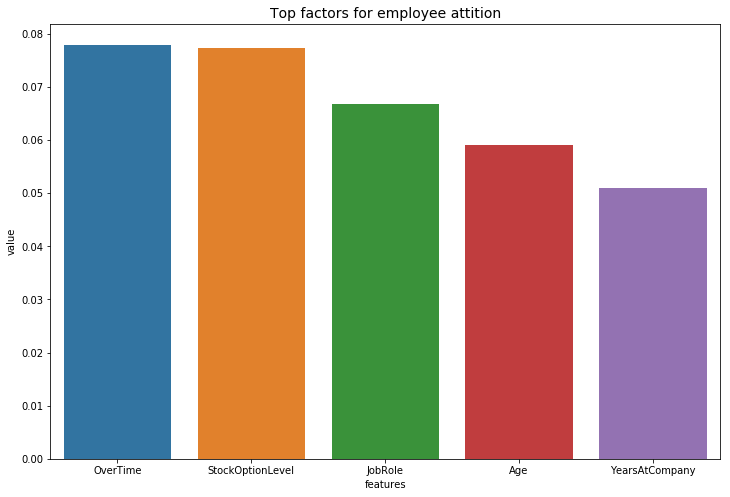

In [57]:
plt.figure(figsize=(12,8))
plt.title('Top factors for employee attition', fontsize=14)
sns.barplot(x='features' , y='value', data = top_features)
plt.show()

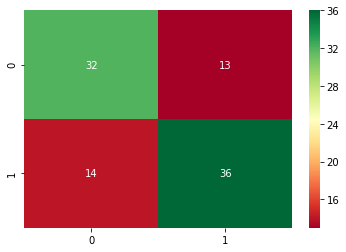

In [71]:
#confusion matrix
cn = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cn, annot= True, cmap='RdYlGn')

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(learning_rate=0.2)
ada_model.fit(X_train, y_train)

pred = ada_model.predict(X_train)
print('train accuracy score :', accuracy_score(y_train, pred))

ada_pred = ada_model.predict(X_test)
print('train accuracy score :', accuracy_score(y_test, xgb_pred))

train accuracy score : 0.8153034300791556
train accuracy score : 0.7157894736842105


In [29]:
print('Adaboost classification report : ')
print(classification_report(y_test, xgb_pred))

Adaboost classification report : 
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        45
           1       0.73      0.72      0.73        50

    accuracy                           0.72        95
   macro avg       0.72      0.72      0.72        95
weighted avg       0.72      0.72      0.72        95



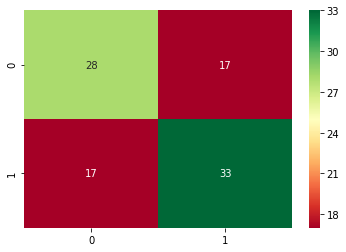

In [30]:
cn = confusion_matrix(y_test, ada_pred)
sns.heatmap(cn, annot= True, cmap='RdYlGn')

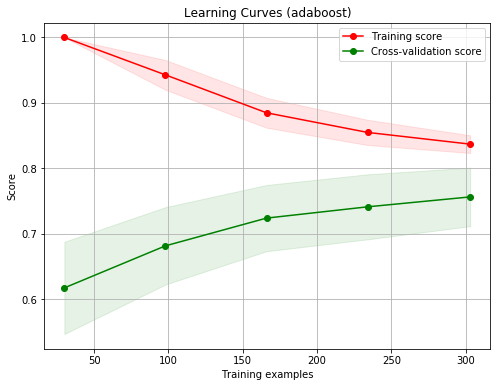

In [77]:
title = "Learning Curves (adaboost)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = ada_model
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()